In [115]:
import psycopg2
import pandas as pd
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt



In [116]:
conn = psycopg2.connect(
    host='localhost',
    port=54320,
    dbname='my_database',
    password='pass',
    user='user',
    )

In [117]:
df = pd.read_csv("All_Labeled_users" + "/labeled_users.csv")[["user_id","label","start_date"]]
df.columns = ["user_id","label","date"]

In [118]:
df.sort_values(by=["user_id","label","date"], inplace=True)

In [119]:
def get_cluster_neighbour_data(cluster):
    cur = conn.cursor()
    query = """
    WITH clustered_users_neighbours AS 
    (
    SELECT c.user_id, c.number_of_links, c.type, u.label as user_cluster, c.date 
    FROM counted_neighbours c 
    JOIN user_mapping u ON c.user_id = u.user_id AND c.date = u.date
    )
    
    SELECT AVG(number_of_links) as number_of_links, type, date 
    FROM clustered_users_neighbours WHERE user_cluster = '{}' 
    GROUP BY user_cluster, type, date
    ORDER BY date
    """.format(cluster)
    cur.execute(query)
    res = cur.fetchall()
    conn.commit()
    cur.close()
    return res

In [120]:
types_colors = {0:"b",1:"k",2:"r",3:"g",4:"y",5:"c",6:"m"}
def plot_neighbours():
    for clust in range(0,7):
        data = []
        data.extend(get_cluster_neighbour_data(clust))
        df = pd.DataFrame(data, columns = ["number_of_links", "type", "date"] )
        ## mozna aggfunc first bo nie ma takich samych par type i data wiec mozna zawsze wziac pierwszy wynik
        cluser_neighbour_table = df.pivot_table(index='date',columns = ['type'], values ='number_of_links', aggfunc='first')
        cluser_neighbour_table = cluser_neighbour_table.fillna(0)
        
        neighbour_types = cluser_neighbour_table.columns.values
        
        cluser_neighbour_table = cluser_neighbour_table.reset_index()
        
        plt.figure(figsize=(20,10))
        for t in neighbour_types:
            plt.plot('date', str(t), data=cluser_neighbour_table, marker='', markerfacecolor=types_colors.get(t))
        #plt.yscale('symlog')
        plt.legend()
        plt.title("Number of neighbours of {}".format(clust))
        plt.savefig("NeighbourFigs/numbers_of_{}".format(clust))
        

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Second argument '1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Second argument '2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Second argument '3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Second argument '4' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


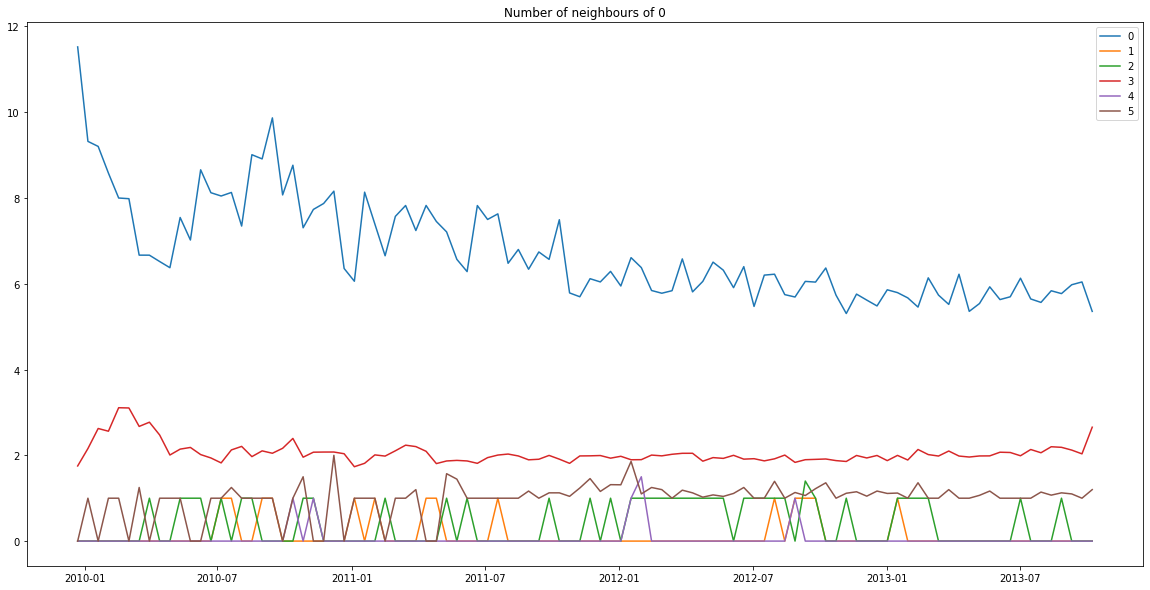

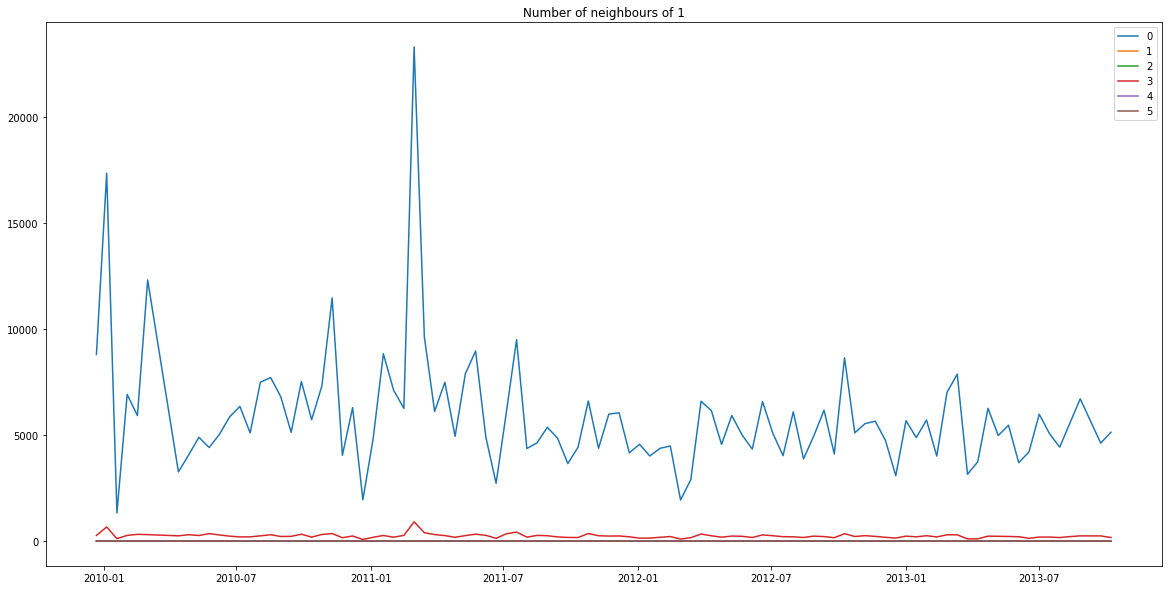

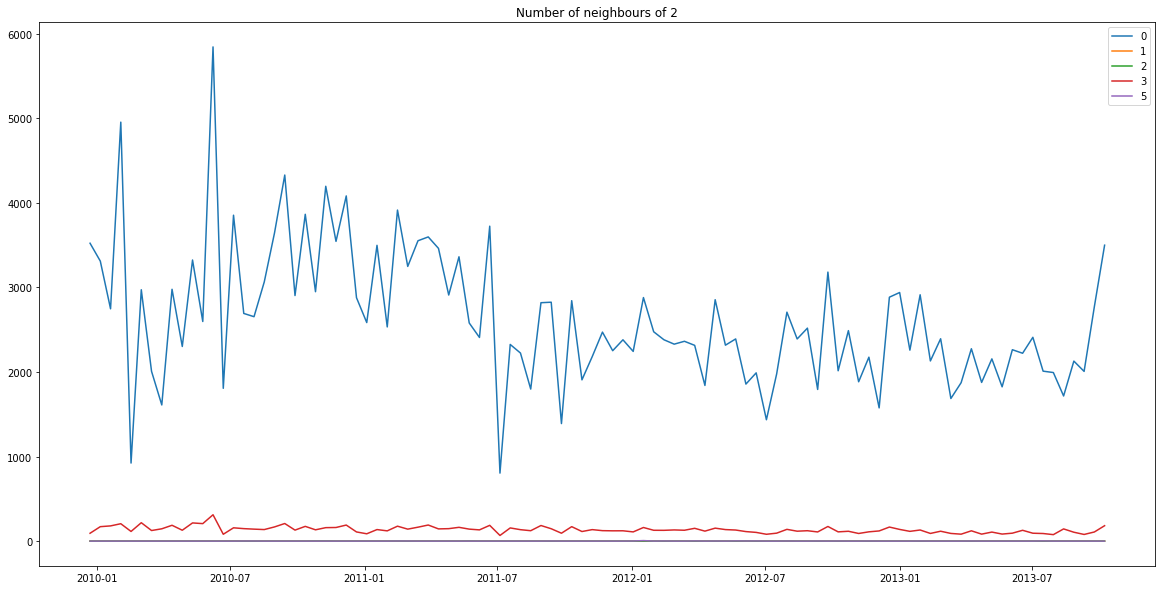

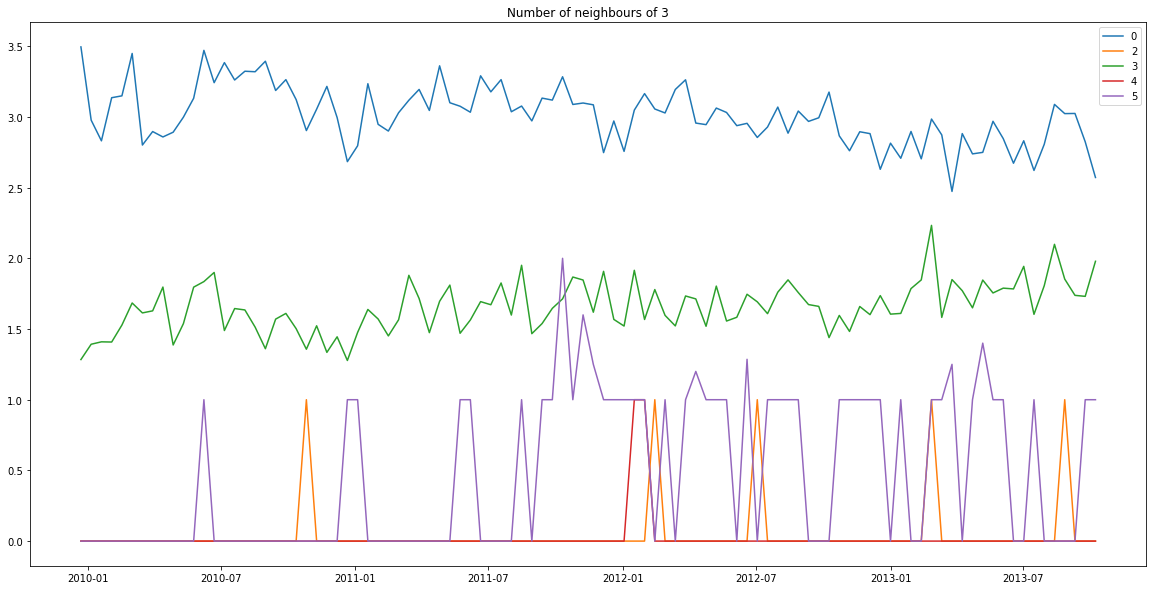

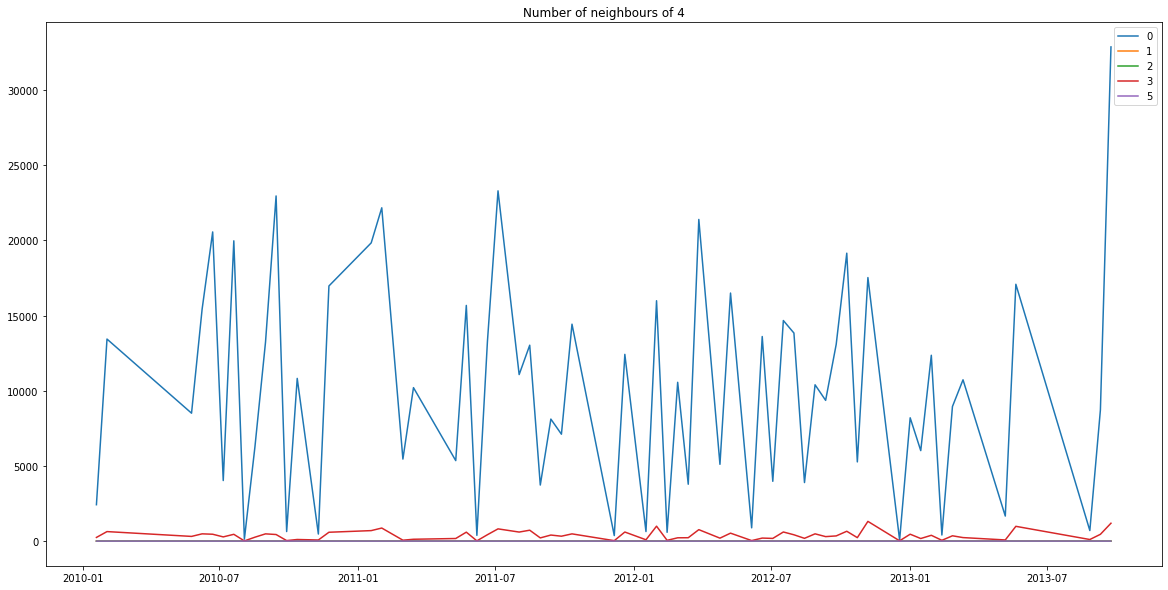

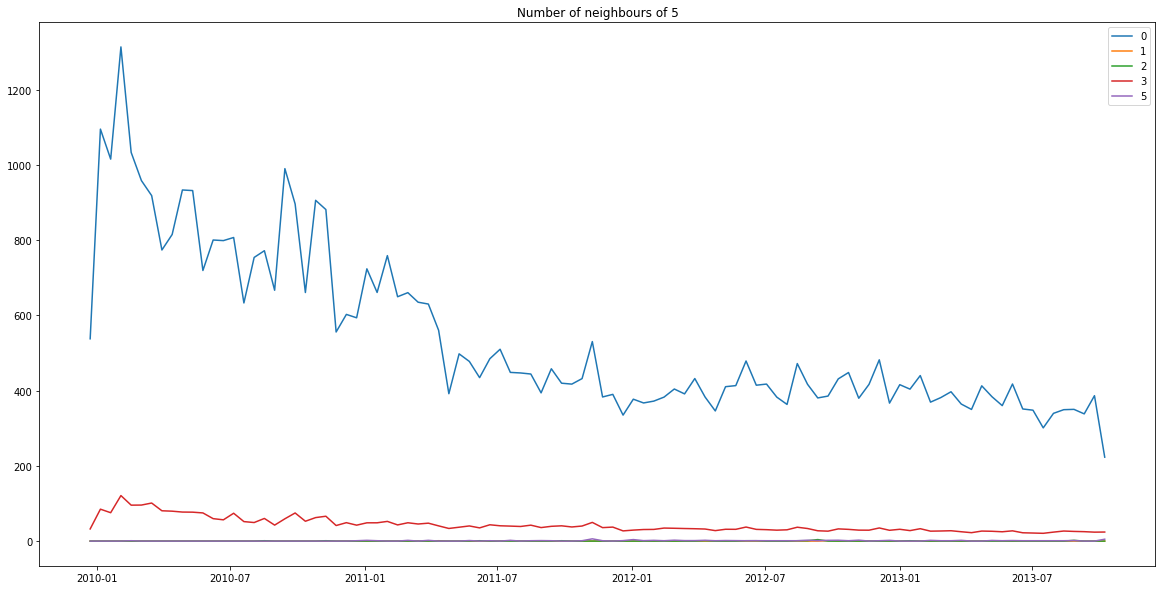

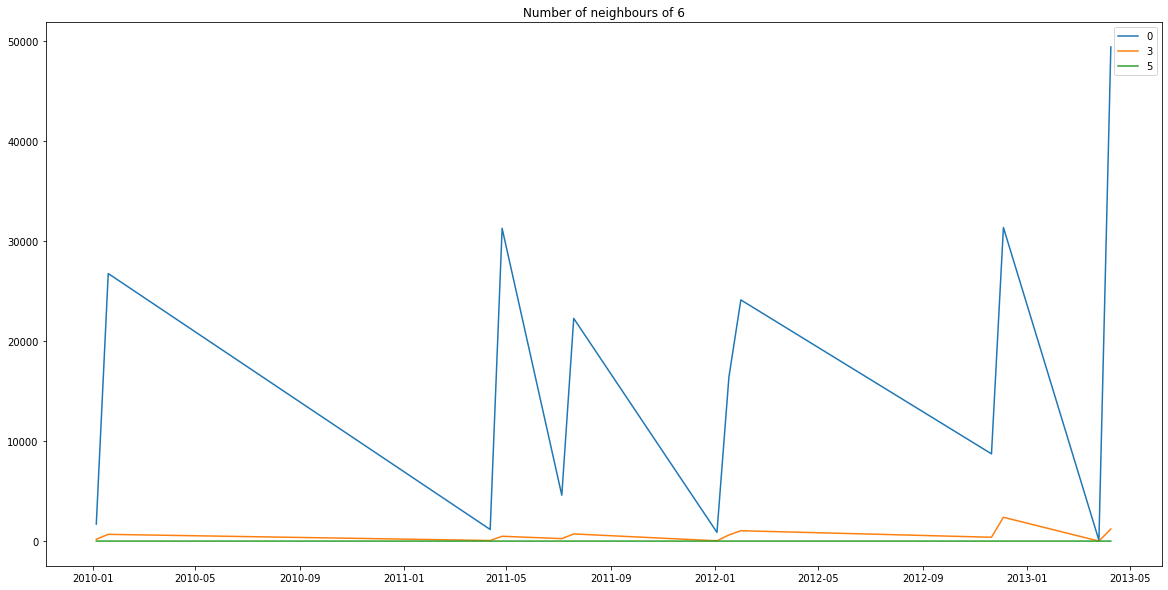

In [48]:
plot_neighbours()

In [121]:
types_colors = {0:"b",1:"k",2:"r",3:"g",4:"y",5:"c",6:"m"}
def plot_neighbours_picks_diffs():
    for clust in range(0,7):
        data = []
        data.extend(get_cluster_neighbour_data(clust))
        df = pd.DataFrame(data, columns = ["number_of_links", "type", "date"] )
        ## mozna aggfunc first bo nie ma takich samych par type i data wiec mozna zawsze wziac pierwszy wynik
        cluser_neighbour_table = df.pivot_table(index='date',columns = ['type'], values ='number_of_links', aggfunc='first')
        cluser_neighbour_table = cluser_neighbour_table.fillna(0)
        
        neighbour_types = cluser_neighbour_table.columns.values
        
        cluser_neighbour_table = cluser_neighbour_table.reset_index()
        cluser_neighbour_table[neighbour_types] = cluser_neighbour_table[neighbour_types].diff()
        cluser_neighbour_table = cluser_neighbour_table.drop(cluser_neighbour_table.index[0])
        
        plt.figure(figsize=(20,10))
        for t in neighbour_types:
            plt.plot('date', str(t), data=cluser_neighbour_table, marker='', markerfacecolor=types_colors.get(t))
        #plt.yscale('symlog')
        plt.legend()
        plt.title("Number of neighbours of {}".format(clust))
        plt.savefig("NeighbourFigs/picks_diff_figs{}".format(clust))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Second argument '1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Second argument '2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Second argument '3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Second argument '4' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


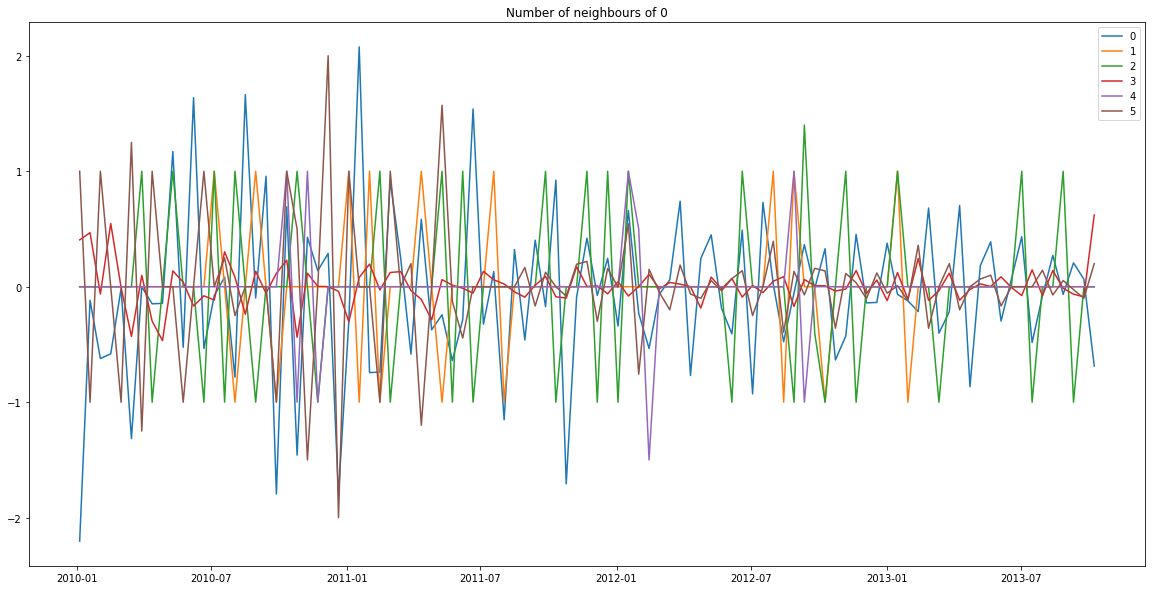

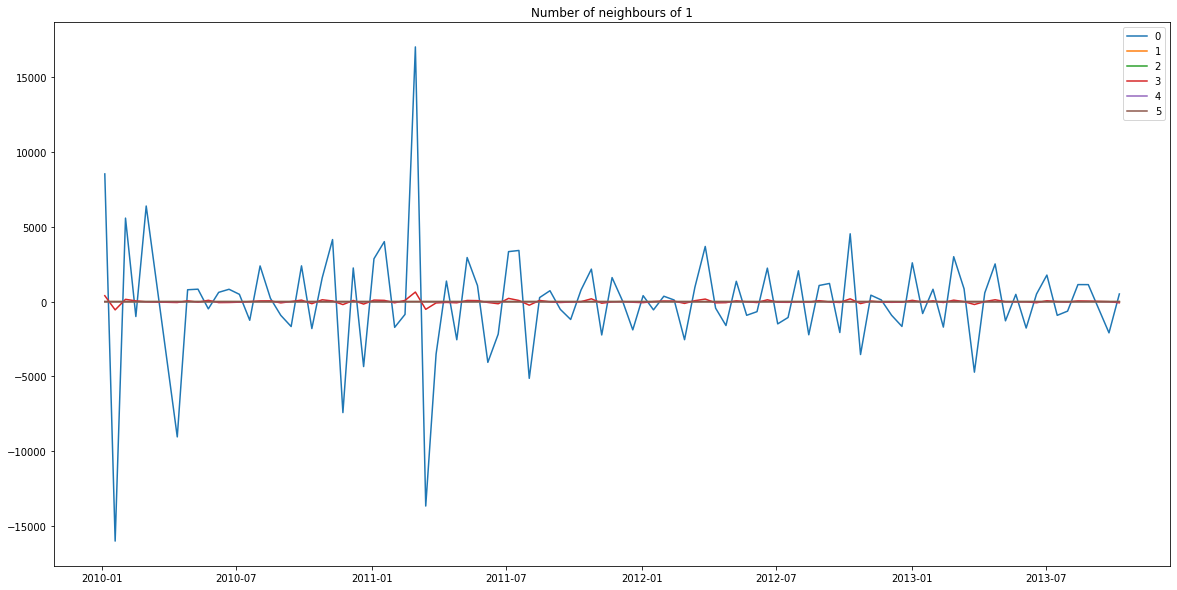

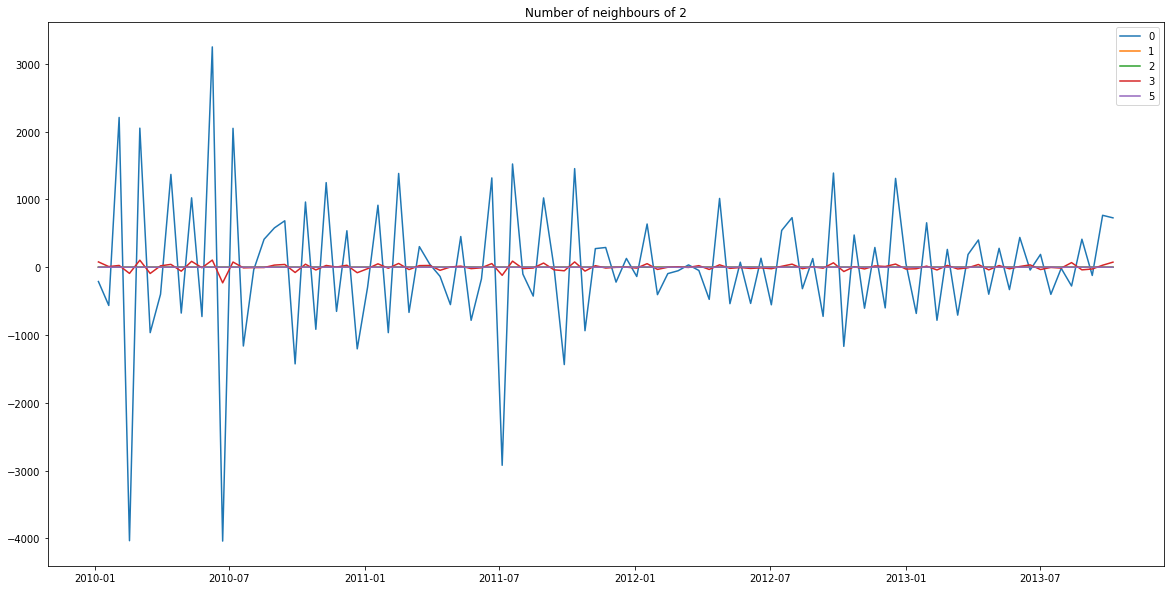

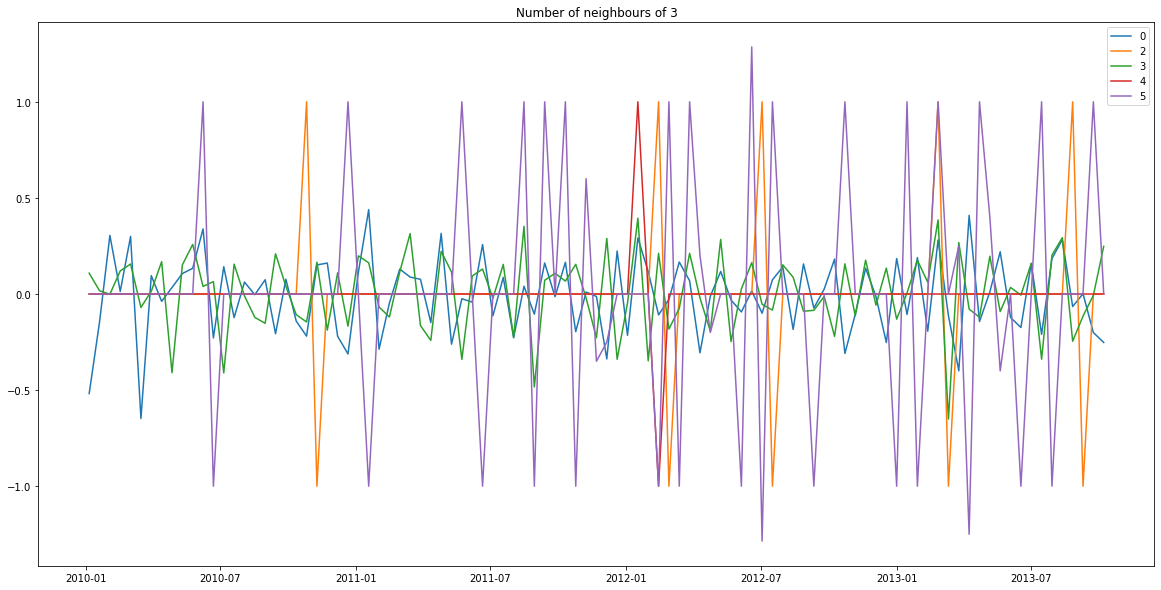

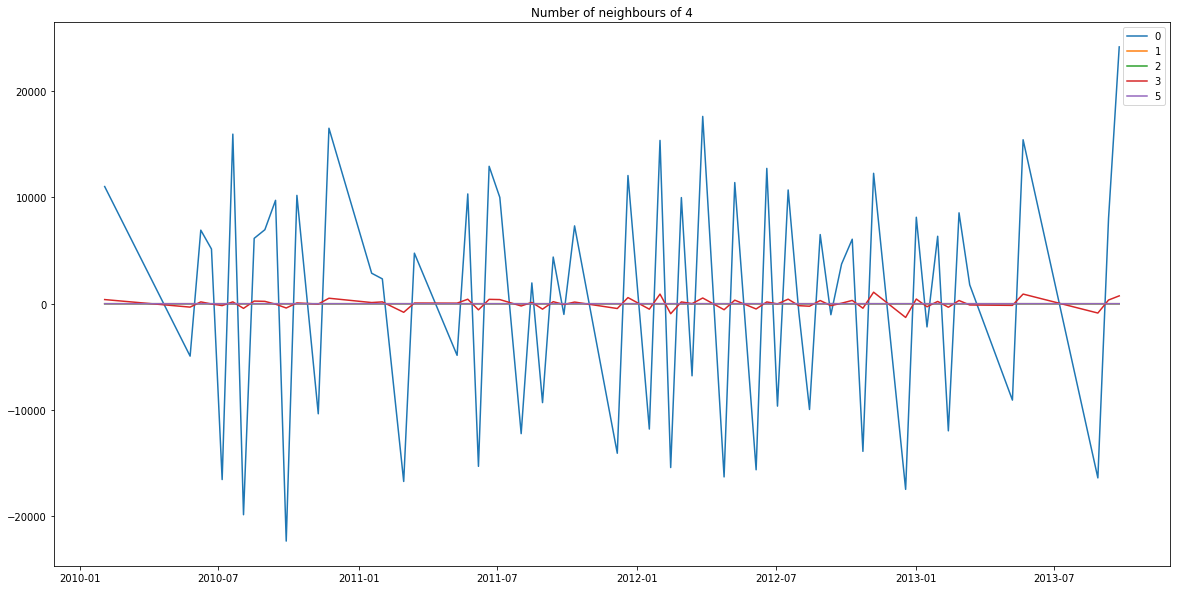

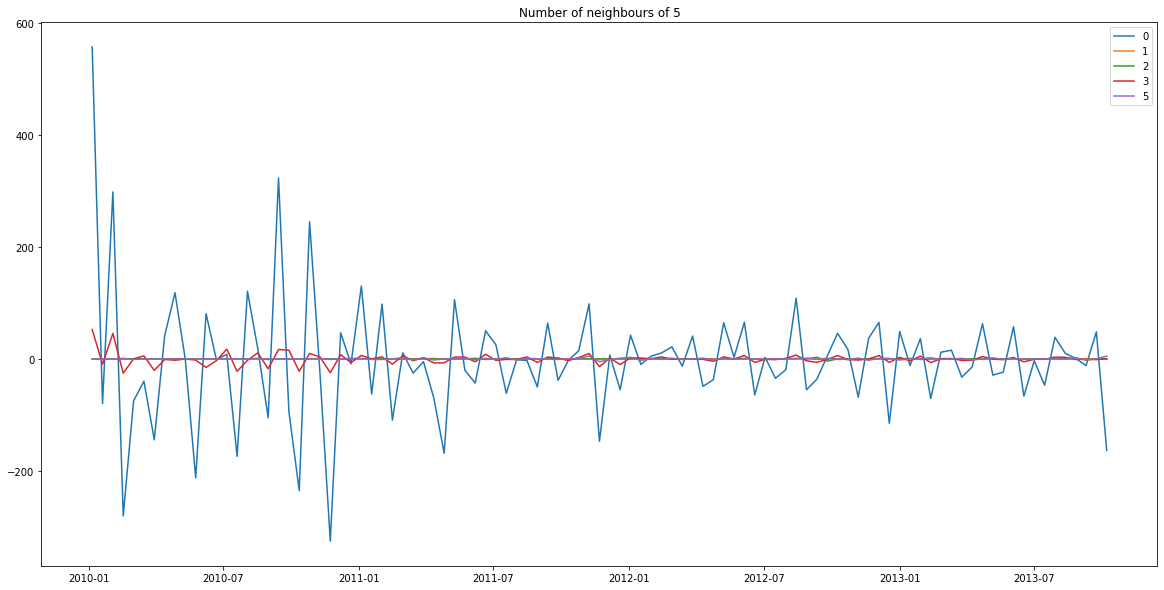

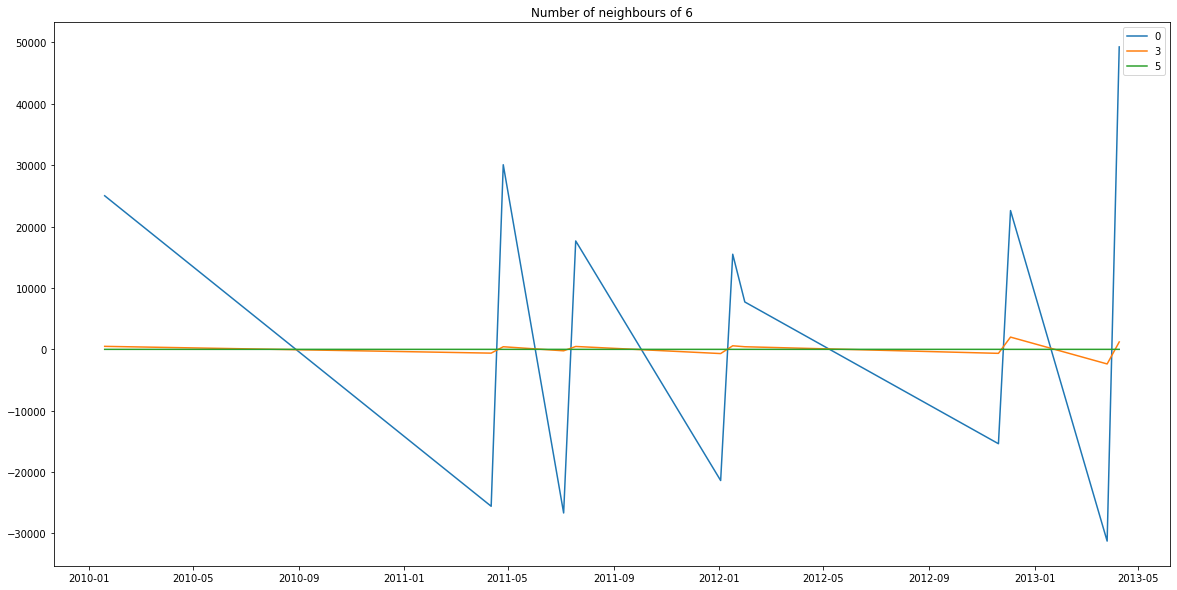

In [74]:
plot_neighbours_picks_diffs()

In [126]:
types_colors = {0:"b",1:"k",2:"r",3:"g",4:"y",5:"c",6:"m"}
def neighbours_picks_diffs_table():
    result = pd.DataFrame()
    for clust in range(0,7):
        data = []
        data.extend(get_cluster_neighbour_data(clust))
        df = pd.DataFrame(data, columns = ["number_of_links", "type", "date"] )
        ## mozna aggfunc first bo nie ma takich samych par type i data wiec mozna zawsze wziac pierwszy wynik
        cluser_neighbour_table = df.pivot_table(index='date',columns = ['type'], values ='number_of_links', aggfunc='first')
        cluser_neighbour_table = cluser_neighbour_table.fillna(0)
 
        all_neighbours = ['0','1','2','3','4','5','6']
        neighbour_types = cluser_neighbour_table.columns.values
        diff_neighbours = np.setdiff1d(all_neighbours,neighbour_types)

        
        cluser_neighbour_table = cluser_neighbour_table.reset_index()
        cluser_neighbour_table[neighbour_types] = cluser_neighbour_table[neighbour_types].diff()
        cluser_neighbour_table = cluser_neighbour_table.drop(cluser_neighbour_table.index[0])
        for dif in diff_neighbours:
            cluser_neighbour_table.insert(0, str(dif), 0)
        cluser_neighbour_table = cluser_neighbour_table.reindex(sorted(cluser_neighbour_table.columns), axis=1)
        cluser_neighbour_table = cluser_neighbour_table.drop(columns =["date"]).mean(axis=0)
        cluser_neighbour_table
        result["stats_of_"+str(clust)] = cluser_neighbour_table
    result.index.name = 'neighbour_type'
    return result.reset_index()

In [127]:
neighbours_picks_diffs_table_df = neighbours_picks_diffs_table()

In [128]:
print(neighbours_picks_diffs_table_df.to_latex())

\begin{tabular}{llrrrrrrr}
\toprule
{} & neighbour\_type &  stats\_of\_0 &  stats\_of\_1 &  stats\_of\_2 &  stats\_of\_3 &  stats\_of\_4 &  stats\_of\_5 &  stats\_of\_6 \\
\midrule
0 &              0 &   -0.062291 &  -38.216667 &   -0.235078 &   -0.009329 &  483.333333 &   -3.179258 &     3972.00 \\
1 &              1 &    0.000000 &    0.000000 &    0.000000 &    0.000000 &    0.000000 &    0.000000 &        0.00 \\
2 &              2 &    0.000000 &    0.000000 &    0.000000 &    0.000000 &    0.000000 &    0.000000 &        0.00 \\
3 &              3 &    0.009127 &   -1.033333 &    0.901745 &    0.007021 &   15.015873 &   -0.083014 &       85.25 \\
4 &              4 &    0.000000 &    0.000000 &    0.000000 &    0.000000 &    0.000000 &    0.000000 &        0.00 \\
5 &              5 &    0.012121 &    0.000000 &    0.000000 &    0.010101 &    0.000000 &    0.050505 &        0.00 \\
6 &              6 &    0.000000 &    0.000000 &    0.000000 &    0.000000 &    0.000000 &    0.000

In [124]:
def get_global_cluster_neighbour_data():
    cur = conn.cursor()
    query = """
    WITH clustered_users_neighbours AS 
    (
    SELECT c.user_id, c.number_of_links, c.type, u.label as user_cluster, c.date 
    FROM counted_neighbours c 
    JOIN user_mapping u ON c.user_id = u.user_id AND c.date = u.date
    )
    
    SELECT user_cluster, type as neighbour_type, 
    AVG(number_of_links) AS average,
    STDDEV(number_of_links) AS standard_deviation,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY number_of_links) AS median,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY number_of_links) AS q3,
    MAX(number_of_links) AS max,
    MIN(number_of_links) AS min
    FROM clustered_users_neighbours
    GROUP BY user_cluster, type
    ORDER BY user_cluster, type
    """
    cur.execute(query)
    res = cur.fetchall()
    conn.commit()
    cur.close()
    return res

In [61]:
def global_statistics():
    data = []
    data.extend(get_global_cluster_neighbour_data())
    df = pd.DataFrame(data, columns = ["cluster_role", "neighbour_type", "average", "standard_deviation", "median", "q3", "max", "min"] )
    return df

In [125]:
global_statistics_df = global_statistics()

In [129]:
print(global_statistics_df.to_latex())

\begin{tabular}{lllllrrrr}
\toprule
{} & cluster\_role & neighbour\_type &                 average &      standard\_deviation &   median &        q3 &    max &  min \\
\midrule
0  &            0 &              0 &      6.4673941274761925 &     34.4447823435271790 &      2.0 &      6.00 &   7021 &    1 \\
1  &            0 &              1 &  1.00000000000000000000 &                       0 &      1.0 &      1.00 &      1 &    1 \\
2  &            0 &              2 &      1.0263157894736842 &  0.22941573387056176590 &      1.0 &      1.00 &      3 &    1 \\
3  &            0 &              3 &      2.0084515711557583 &      4.7417901717970426 &      1.0 &      2.00 &    257 &    1 \\
4  &            0 &              4 &      1.1428571428571429 &  0.37796447300922722721 &      1.0 &      1.00 &      2 &    1 \\
5  &            0 &              5 &      1.1615598885793872 &  0.68703377526319907323 &      1.0 &      1.00 &     14 &    1 \\
6  &            1 &              0 &   5524.17685